In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from citipy import citipy
import pandas as pd

In [2]:
#create two lists which will generate lat and log
lat = []
log = []

#Generate 500 random numbers for lat nad log
lat = np.random.randint(low=-90.000, high=90.000, size=1500)
log = np.random.randint(low=-180.000, high=180.000, size=1500)

len(lat)
len(log)

1500

In [3]:
#Identify cities based on random lat an long 
cities = []
for latitude, longitude in zip(lat, log):
    city = citipy.nearest_city(latitude, longitude).city_name
    if city not in cities:
        cities.append(city)
len(cities)

594

In [4]:
#api key 
api_key = '20b16a8d838f0ff361bbeace6846183e'

In [5]:
#creating a dictionary
dictionary_weather = {"name": [], "temp": [], "humidity": [], "clouds": [], "wind": [], "lat": [], "lon": [], "id": []}
# to get the API 
basic_url = "http://api.openweathermap.org/data/2.5/weather?units=metric"
city_id = 1

#call and itirate throgh JSONs
for city in cities:
    if len(dictionary_weather["name"]) < 500:
        try:
            url = basic_url+"&appid="+api_key+"&q="+str(city)
            whether_request = requests.get(url)
            whether_data = whether_request.json()
            dictionary_weather["name"].append(whether_data["name"])
            dictionary_weather["temp"].append(whether_data["main"]["temp"])
            dictionary_weather["humidity"].append(whether_data["main"]["humidity"])
            dictionary_weather["clouds"].append(whether_data["clouds"]["all"])
            dictionary_weather["wind"].append(whether_data["wind"]["speed"])
            dictionary_weather["lat"].append(whether_data["coord"]["lat"])
            dictionary_weather["lon"].append(whether_data["coord"]["lon"])
            dictionary_weather["id"].append(city_id)
        except:
            pass


In [6]:
#convert dictionary into data frame 
weather_df = pd.DataFrame.from_dict(dictionary_weather,orient='index').transpose()
weather_df.head()

,name,temp,humidity,clouds,wind,lat,lon,id
0,Nambucca Heads,6.99,70,0,3.1,-30.64,152.99,1
1,Arraial do Cabo,22,78,0,11.3,-22.97,-42.02,1
2,Thompson,16,55,75,4.6,55.74,-97.86,1
3,Leo,24.57,82,95,1.62,11.1,-2.1,1
4,Port Alfred,15.56,91,0,0.45,-33.59,26.89,1


In [7]:
#export in case of emergency data frame
export_csv = weather_df.to_csv (r'weather_dataframe.csv', index = None, header=True)


In [8]:
temprature_lat = weather_df[["temp","lat"]]
temprature_lat.head(5)
type(temprature_lat)

pandas.core.frame.DataFrame

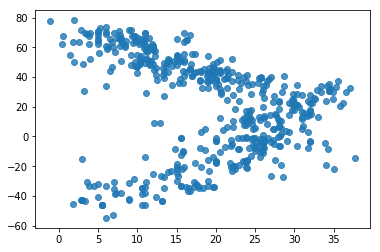

In [9]:

plt.scatter(weather_df.temp, weather_df.lat, label = 'Temparature', alpha = 0.8)
plt.savefig('temperature.png')

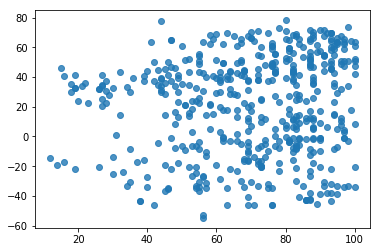

In [10]:
plt.scatter(weather_df.humidity, weather_df.lat, label = 'Temparature', alpha = 0.8)
plt.savefig('humidity.png')


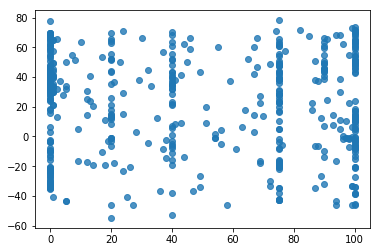

In [11]:
plt.scatter(weather_df.clouds, weather_df.lat, label = 'Temparature', alpha = 0.8)
plt.savefig('clouds.png')


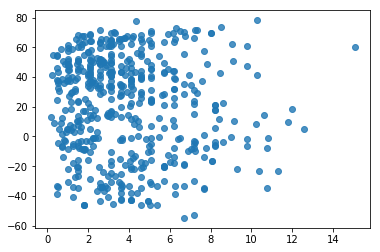

In [12]:
plt.scatter(weather_df.wind, weather_df.lat, label = 'Temparature', alpha = 0.8)
plt.savefig('wind.png')
